In [19]:
import torch
import matplotlib.pyplot as plt

import sys
sys.path.append('..')
from models.vae import FactorVAE

In [2]:
# import tensors from .pt file
X = torch.load('X_N6000_D100_d10.pt')
P = torch.load('P_N6000_D100_d10.pt')
print(f'X shape: {X.shape}')
print(f'P shape: {P.shape}')

X shape: torch.Size([6000, 100])
P shape: torch.Size([6000, 10])


In [34]:
# load network from .ckpt file
model = FactorVAE(gamma=30, d_x=100, d_z=10, d_latent=10, n_layers=5, lr=0.001)
model.load_state_dict(torch.load('model(COMPRESSED FEATURES)_N6000_D100_d10_gam30_L5_lr0.001_bs3000_e1000.ckpt'))

<All keys matched successfully>

tensor(0.0001)


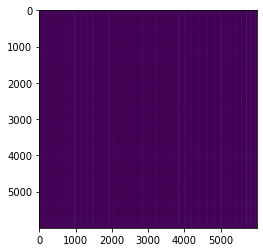

In [37]:
# compute EDM of P
P_EDM = torch.cdist(P, P, p=2)
# feature EDM
Z = model.encoder(X)
Z_EDM = torch.cdist(Z, Z, p=2)

# set diagonal entries of X_EDM to 1
# X_EDM[torch.eye(X_EDM.shape[0], dtype=torch.bool)] = 1
P_EDM[torch.eye(P_EDM.shape[0], dtype=torch.bool)] = 1

EDM_ratio = (Z_EDM / P_EDM).detach()
print(torch.min(EDM_ratio[EDM_ratio != 0]))

# display an image of EDM_ratio
plt.imshow(EDM_ratio, vmin = 0, vmax = torch.max(EDM_ratio).numpy())
